In [1]:
%pylab inline
import pandas as pd
import os
import scipy.stats

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Paths
DATADIR="/storage/mgymrek/chipmunk/fig2_power"
OUTDIR=os.path.join(DATADIR, "pdfs")

FIG2COLOR = "darkblue"

Populating the interactive namespace from numpy and matplotlib


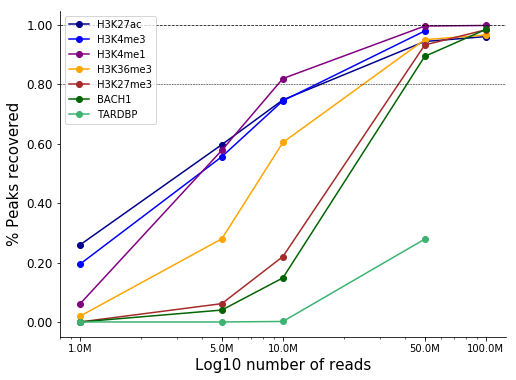

In [15]:
fcolors = {
    "GM12878_H3K27ac_ENCFF097SQI_ENCFF465WTH": "darkblue",
    "GM12878_H3K4me3_ENCFF398NET_ENCFF068UAA": "blue",
    "GM12878_H3K27me3_ENCFF014HHB_ENCFF533IKU": "brown",
    "GM12878_H3K36me3_ENCFF191SDM_ENCFF695NNX": "orange",
    "GM12878_H3K4me1_ENCFF252ZII_ENCFF966LMJ": "purple",
    "GM12878_BACH1_ENCFF518TTP_ENCFF866OLZ": "darkgreen",
    "GM12878_TARDBP_ENCFF673WUM_ENCFF016QUV": "mediumseagreen"
}

usebroad = {
    "GM12878_H3K27ac_ENCFF097SQI_ENCFF465WTH": True,
    "GM12878_H3K4me3_ENCFF398NET_ENCFF068UAA": True,
    "GM12878_H3K4me1_ENCFF252ZII_ENCFF966LMJ": True,
    "GM12878_H3K27me3_ENCFF014HHB_ENCFF533IKU": True,
    "GM12878_H3K36me3_ENCFF191SDM_ENCFF695NNX": True
}

fig = plt.figure()
fig.set_size_inches((8, 6))
ax = fig.add_subplot(111)
for factor in ["GM12878_H3K27ac_ENCFF097SQI_ENCFF465WTH", "GM12878_H3K4me3_ENCFF398NET_ENCFF068UAA", "GM12878_H3K4me1_ENCFF252ZII_ENCFF966LMJ", 
              "GM12878_H3K36me3_ENCFF191SDM_ENCFF695NNX", "GM12878_H3K27me3_ENCFF014HHB_ENCFF533IKU", 
              "GM12878_BACH1_ENCFF518TTP_ENCFF866OLZ","GM12878_TARDBP_ENCFF673WUM_ENCFF016QUV" ]: #fcolors.keys():
    if usebroad.get(factor, False):
        data = pd.read_csv(os.path.join(DATADIR, "%s.broad.power.tab"%factor),
                   sep=" ", names=["factor","numreads","numpeaks","total"])
    else:
        data = pd.read_csv(os.path.join(DATADIR, "%s.power.tab"%factor),
                   sep=" ", names=["factor","numreads","numpeaks","total"])
    data["power"] = data["numpeaks"]*1.0/data["total"]
    data = data[(data["power"]!=0) | (data["numreads"]==1000000)] # TODO remove after all done
    ax.plot((data["numreads"]), data["power"], marker="o", color=fcolors[factor], label=factor.split("_")[1])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axhline(y=1.00, linestyle="dashed", color="black", linewidth=0.75)
ax.axhline(y=0.8, linestyle="dashed", color="black", linewidth=0.5)

readnums = [item*1000000 for item in [1, 5, 10, 50, 100]]
ax.set_xscale('log');
ax.set_xticks(readnums)
ax.set_xticklabels(["%sM"%(item/1000000) for item in readnums])
ax.set_yticklabels(["%0.2f"%item for item in ax.get_yticks()], size=12)
ax.set_xlabel("Log10 number of reads", size=15)
ax.set_ylabel("% Peaks recovered", size=15);
ax.legend(loc="upper left");